## This is the Cats vs Dogs notebook - I will try to classify dogs and cats based on each photo's pixel values

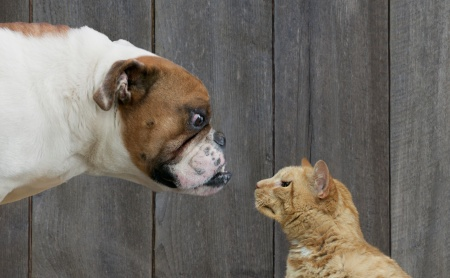

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
import os
import cv2
from skimage.io import imread
import seaborn as sns

## Load the Data

In [2]:
file_path = r'C:\Users\yaron\Data Science\train\train'
filenames = os.listdir(file_path)
classes = []
for filename in filenames:
    image_class = filename.split('.')[0]
    if image_class.startswith('dog'):
        classes.append(1)
    else:
        classes.append(0)

In [3]:
df = pd.DataFrame({'filename': filenames, 'category': classes})

### 0 - cat
### 1 - dog 

In [4]:
df

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


In [5]:
df.category.value_counts()

0    12500
1    12500
Name: category, dtype: int64

In [6]:
os.path.join(f'{file_path}', filenames[0])

'C:\\Users\\yaron\\Data Science\\train\\train\\cat.0.jpg'

### I decided to turn the files into gray, because it will reduce the number of features dramatically, which will help because the colour doesn't matter, since cats and dogs can have the same colour of fur.

In [7]:
new_df = pd.DataFrame()
for i in range(25000):
    img = cv2.imread(os.path.join(f'{file_path}', filenames[i]), 0)
    img_resized = cv2.resize(img, (28,28),interpolation = cv2.INTER_AREA)
    img_reshape = img_resized.reshape(28*28)
    one_row_of_df = pd.DataFrame(img_reshape)
    new_df = pd.concat([new_df,one_row_of_df],axis=1)

In [8]:
df_gray = new_df.transpose()
df_gray
df_gray.reset_index(drop=True,inplace=True)
df_gray['category'] = df['category']
df_gray

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,category
0,174,188,199,204,209,215,184,161,135,102,...,28,9,17,40,31,11,4,3,3,0
1,44,47,51,43,42,52,65,69,75,90,...,55,35,34,51,52,55,57,61,53,0
2,50,59,60,59,57,54,52,52,50,52,...,116,131,72,75,72,81,128,144,165,0
3,223,228,227,229,227,226,228,225,223,209,...,160,176,235,250,243,229,213,211,215,0
4,100,95,133,183,196,238,213,180,153,141,...,99,106,100,96,99,95,80,85,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,142,147,149,152,154,158,159,160,163,164,...,157,169,153,159,163,163,165,167,168,1
24996,92,90,88,83,95,88,97,98,105,108,...,53,13,20,33,68,82,88,84,83,1
24997,41,50,44,51,91,111,72,75,101,122,...,153,154,166,160,145,135,136,138,138,1
24998,243,181,114,90,88,86,94,87,103,98,...,137,135,125,115,98,99,106,112,120,1


In [9]:
df_gray.isna().sum()

0           0
1           0
2           0
3           0
4           0
           ..
780         0
781         0
782         0
783         0
category    0
Length: 785, dtype: int64

## Split to Training and Testing

In [10]:
from sklearn.model_selection import train_test_split
x = np.array(df_gray.drop(['category'],axis=1))
y = np.array(df_gray['category'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =0)

## Scaling

In [12]:
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Model - KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred1 = knn.predict(x_test)

### Accuracy Check

              precision    recall  f1-score   support

           0       0.57      0.63      0.60      2496
           1       0.59      0.52      0.55      2504

    accuracy                           0.58      5000
   macro avg       0.58      0.58      0.57      5000
weighted avg       0.58      0.58      0.57      5000

Accuracy:  0.5756


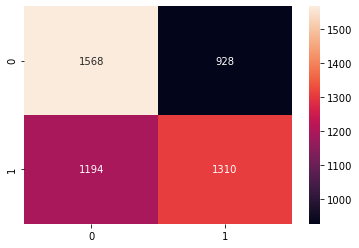

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confmat = confusion_matrix(y_test, y_pred1)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, y_pred1)
acc_score1 = accuracy_score(y_test, y_pred1)
print(class_rep1)
print("Accuracy: ", acc_score1)

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred2 = rf.predict(x_test)

### Accuracy Check

              precision    recall  f1-score   support

           0       0.64      0.69      0.66      2496
           1       0.66      0.61      0.63      2504

    accuracy                           0.65      5000
   macro avg       0.65      0.65      0.65      5000
weighted avg       0.65      0.65      0.65      5000

Accuracy:  0.6488


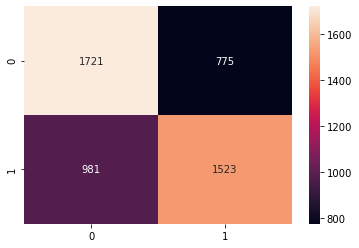

In [17]:
confmat2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(confmat2, annot = True, fmt = "d")
class_rep2 = classification_report(y_test, y_pred2)
acc_score2 = accuracy_score(y_test, y_pred2)
print(class_rep2)
print("Accuracy: ", acc_score2)

## K-Means

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=100).fit(x_train, y_train)
y_pred3 = kmeans.predict(x_test)

### Accuracy Check

              precision    recall  f1-score   support

           0       0.47      0.47      0.47      2496
           1       0.47      0.47      0.47      2504

    accuracy                           0.47      5000
   macro avg       0.47      0.47      0.47      5000
weighted avg       0.47      0.47      0.47      5000

Accuracy:  0.4734


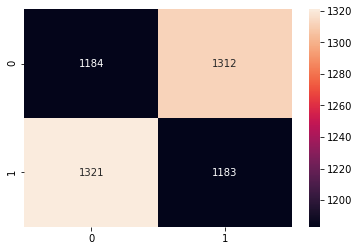

In [19]:
confmat3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(confmat3, annot = True, fmt = "d")
class_rep3 = classification_report(y_test, y_pred3)
acc_score3 = accuracy_score(y_test, y_pred3)
print(class_rep3)
print("Accuracy: ", acc_score3)

## AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred4 = ada.predict(x_test)

### Accuracy Check

              precision    recall  f1-score   support

           0       0.61      0.56      0.58      2496
           1       0.60      0.64      0.62      2504

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.60      0.60      0.60      5000

Accuracy:  0.6024


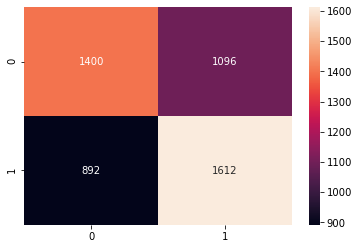

In [21]:
confmat4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(confmat4, annot = True, fmt = "d")
class_rep4 = classification_report(y_test, y_pred4)
acc_score4 = accuracy_score(y_test, y_pred4)
print(class_rep4)
print("Accuracy: ", acc_score4)

## XGBoost

In [22]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred5 = xgb.predict(x_test)

C:\Users\yaron\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:53:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Accuracy Check

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      2496
           1       0.65      0.66      0.66      2504

    accuracy                           0.65      5000
   macro avg       0.65      0.65      0.65      5000
weighted avg       0.65      0.65      0.65      5000

Accuracy:  0.654


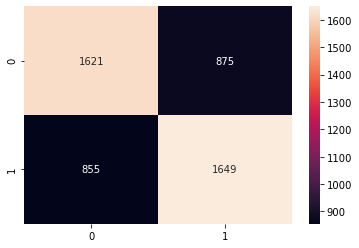

In [23]:
confmat5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(confmat5, annot = True, fmt = "d")
class_rep5 = classification_report(y_test, y_pred5)
acc_score5 = accuracy_score(y_test, y_pred5)
print(class_rep5)
print("Accuracy: ", acc_score5)

## Dimensionality Reduction

In [24]:
from sklearn.decomposition import PCA
pca_784 = PCA(n_components=784)
pca_784.fit(df_gray)

PCA(n_components=784)

Text(0, 0.5, 'Explained variance')

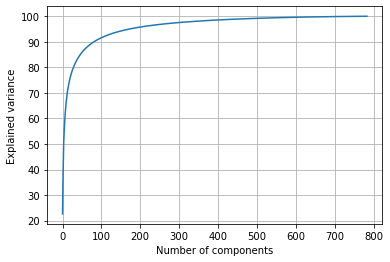

In [25]:
plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [27]:
pca_600 = PCA(n_components=600)
x_reduced = pca_600.fit_transform(x)
x_recovered = pca_600.inverse_transform(x_reduced)

In [ ]:
#image_pca_550 = df_pca_550_recovered[2,:].reshape([28,28])
#plt.imshow(image_pca_550, cmap='gray_r')
#plt.title('Compressed image with 550 components', fontsize=15, pad=15)
#plt.savefig("image_pca_550.png")

In [28]:
np.cumsum(pca_550.explained_variance_ratio_)[-1]

0.9940269779042631

In [29]:
x_reduced_train, x_reduced_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.2, random_state=0)

In [30]:
knn.fit(x_reduced_train, y_train)
y_pred6 = knn.predict(x_reduced_test)
rf.fit(x_reduced_train, y_train)
y_pred7 = rf.predict(x_reduced_test)
kmeans.fit(x_reduced_train, y_train)
y_pred8 = kmeans.predict(x_reduced_test)
ada.fit(x_reduced_train, y_train)
y_pred9 = ada.predict(x_reduced_test)
xgb.fit(x_reduced_train, y_train)
y_pred10 = xgb.predict(x_reduced_test)

C:\Users\yaron\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:56:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

           0       0.57      0.62      0.59      2496
           1       0.59      0.53      0.56      2504

    accuracy                           0.58      5000
   macro avg       0.58      0.58      0.58      5000
weighted avg       0.58      0.58      0.58      5000

Accuracy:  0.5768


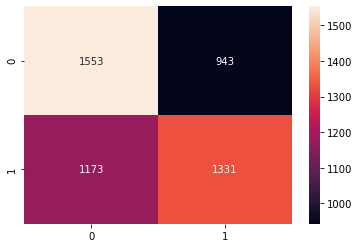

In [36]:
confmat6 = confusion_matrix(y_test, y_pred6)
sns.heatmap(confmat6, annot = True, fmt = "d")
class_rep6 = classification_report(y_test, y_pred6)
acc_score6 = accuracy_score(y_test, y_pred6)
print(class_rep6)
print("Accuracy: ", acc_score6)

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      2496
           1       0.59      0.60      0.60      2504

    accuracy                           0.59      5000
   macro avg       0.59      0.59      0.59      5000
weighted avg       0.59      0.59      0.59      5000

Accuracy:  0.5932


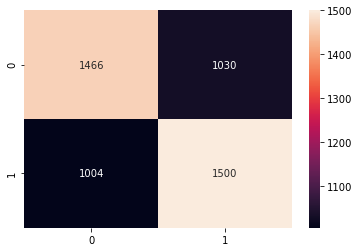

In [38]:
confmat7 = confusion_matrix(y_test, y_pred7)
sns.heatmap(confmat7, annot = True, fmt = "d")
class_rep7 = classification_report(y_test, y_pred7)
acc_score7 = accuracy_score(y_test, y_pred7)
print(class_rep7)
print("Accuracy: ", acc_score7)

              precision    recall  f1-score   support

           0       0.53      0.53      0.53      2496
           1       0.53      0.53      0.53      2504

    accuracy                           0.53      5000
   macro avg       0.53      0.53      0.53      5000
weighted avg       0.53      0.53      0.53      5000

Accuracy:  0.5272


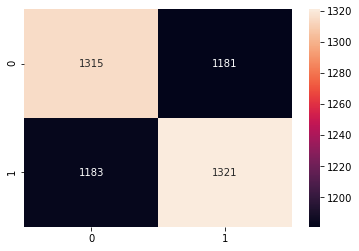

In [39]:
confmat8 = confusion_matrix(y_test, y_pred8)
sns.heatmap(confmat8, annot = True, fmt = "d")
class_rep8 = classification_report(y_test, y_pred8)
acc_score8 = accuracy_score(y_test, y_pred8)
print(class_rep8)
print("Accuracy: ", acc_score8)

              precision    recall  f1-score   support

           0       0.60      0.59      0.60      2496
           1       0.60      0.61      0.60      2504

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.60      0.60      0.60      5000

Accuracy:  0.6004


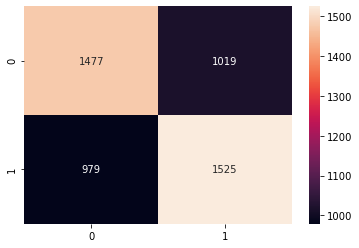

In [40]:
confmat9 = confusion_matrix(y_test, y_pred9)
sns.heatmap(confmat9, annot = True, fmt = "d")
class_rep9 = classification_report(y_test, y_pred9)
acc_score9 = accuracy_score(y_test, y_pred9)
print(class_rep9)
print("Accuracy: ", acc_score9)

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      2496
           1       0.62      0.64      0.63      2504

    accuracy                           0.63      5000
   macro avg       0.63      0.63      0.63      5000
weighted avg       0.63      0.63      0.63      5000

Accuracy:  0.6256


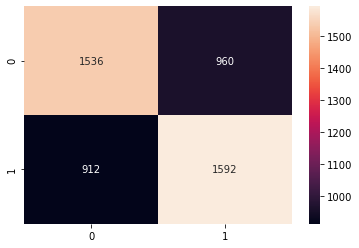

In [41]:
confmat10 = confusion_matrix(y_test, y_pred10)
sns.heatmap(confmat10, annot = True, fmt = "d")
class_rep10 = classification_report(y_test, y_pred10)
acc_score10 = accuracy_score(y_test, y_pred10)
print(class_rep10)
print("Accuracy: ", acc_score10)

### The best accuracy I got is 65.4% with XGBoost